# 13章 ニューラルネットワークの訓練をTensorflowでやってみよう

- Tensorflowとは
- TensorflowのDataset作成方法など
- Tensorflowでの線形回帰やってみよう

In [55]:
from IPython.display import Image
%matplotlib inline

### -Tensorflowとは-
Tensorflowとは機械学習のアルゴリズムを実装して実行するための、スケーラブルなマルチプラットフォームのプログライングインターフェースである。Googleが2015年に開発。CPUとGPUの両方で実行可能だがGPUの方が機械学習モデルの訓練の性能を最大限に発揮できる。
ニューラルネットワークモデルをCPUを使用して訓練に１週間かかることもあるがGPUだと数時間で訓練できることもある優れもの。



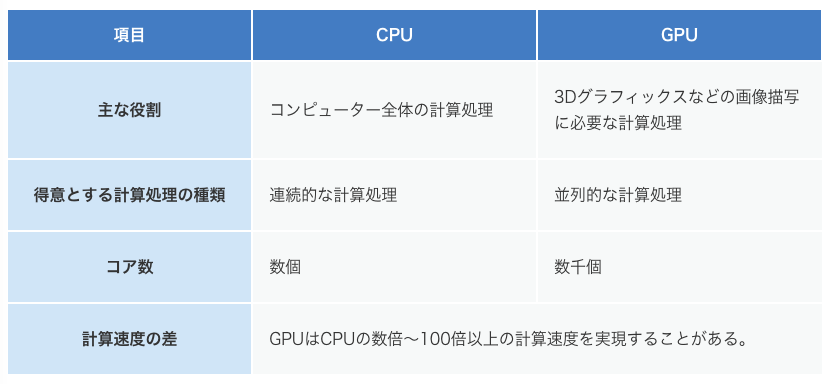

In [332]:
Image(filename='/Users/mac/Desktop/ラクスパートナーズ/Python/python-machine-learning-book-3rd-edition/ch13/images/cpu&gpu.png')

### -特徴-
Tensorflowの最大の特徴ともいえるのが、「ニューラルネットワークの構築」を行うことができ、このニューラルネットワークを使用することにより、機械が人間と同じような論理的思考、学習を行うことができます。他にも「データの読み込み、前処理、計算、状態、出力」といった処理に対し全てテンソルが扱われています。

テンソルとは多次元配列。スカラー、ベクトル、行列などを一般化したものとしてテンソルを考えることができる。具体的にはスカラーを階数０のテンソル、ベクトルを階数１のテンソル、行列を階数２のテンソル、行列に３次元目を追加したものを階数３のテンソルと定義する。Tensorflowの値はNumpy配列に格納される。

イメージ↓

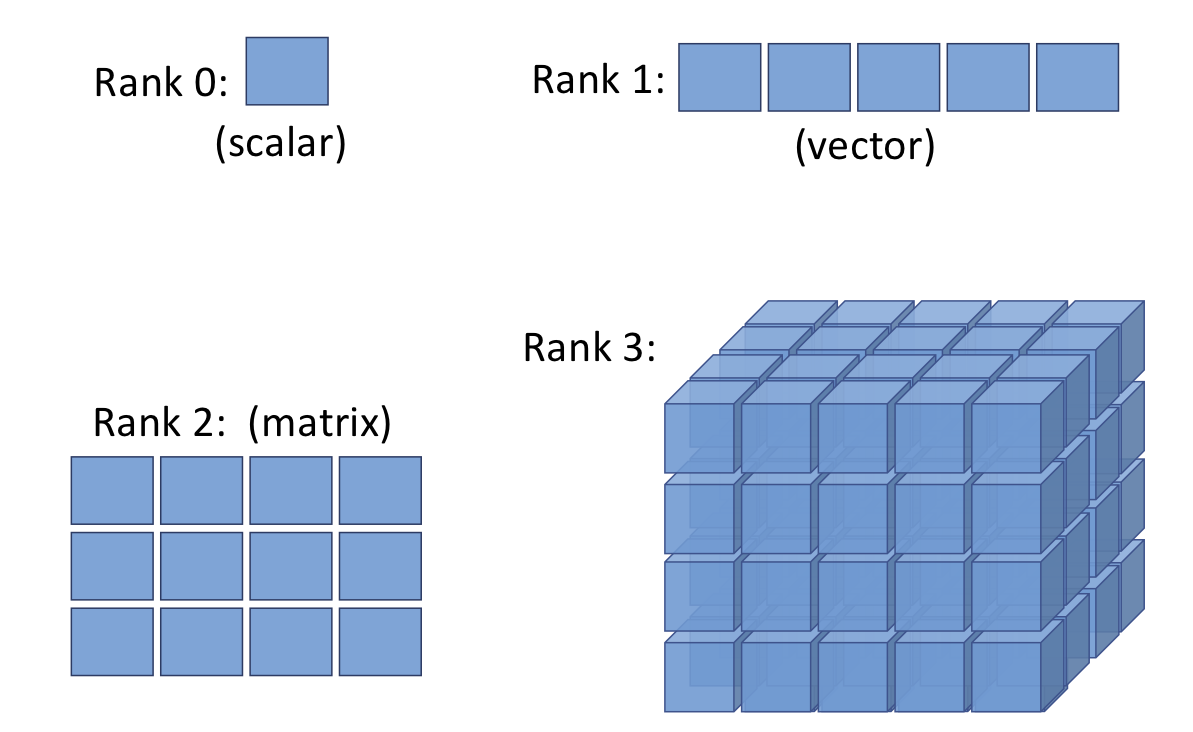

In [569]:
Image(filename='/Users/mac/Desktop/ラクスパートナーズ/Python/python-machine-learning-book-3rd-edition/ch13/images/02.png', width=500)

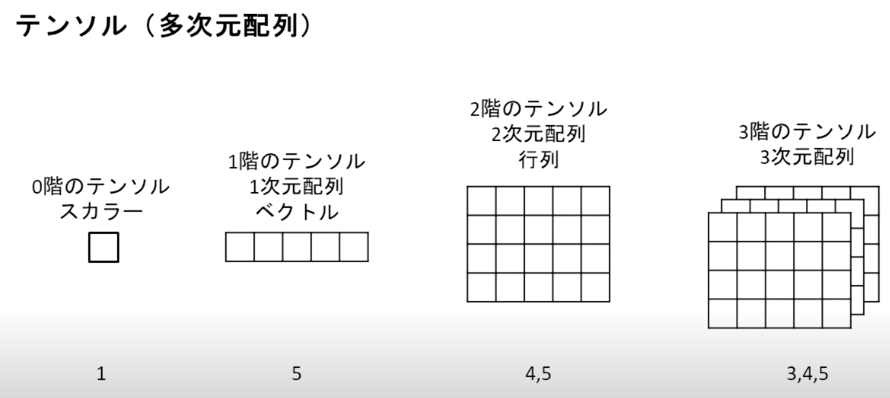

In [71]:
Image(filename='/Users/mac/Desktop/ラクスパートナーズ/Python/python-machine-learning-book-3rd-edition/ch13/images/テンソル1.png', width=500)

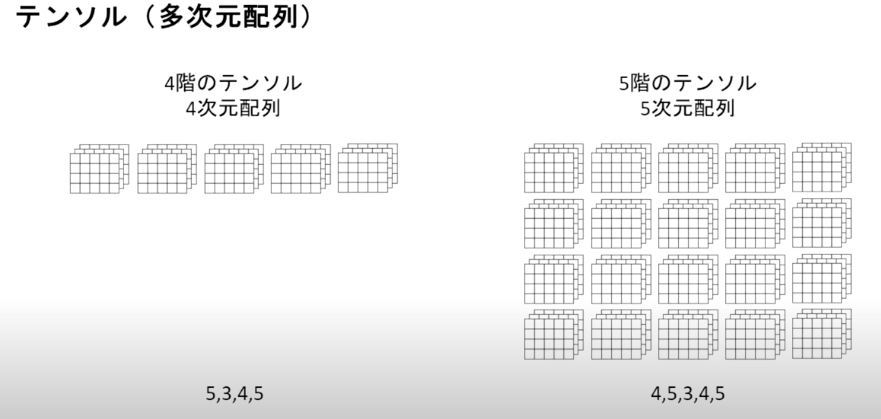

In [72]:
Image(filename='/Users/mac/Desktop/ラクスパートナーズ/Python/python-machine-learning-book-3rd-edition/ch13/images/テンソル2.png', width=500)

### TensorflowのDataset作成方法など

In [155]:
import tensorflow as tf
import numpy as np

#### オブジェクトの生成などの操作方法

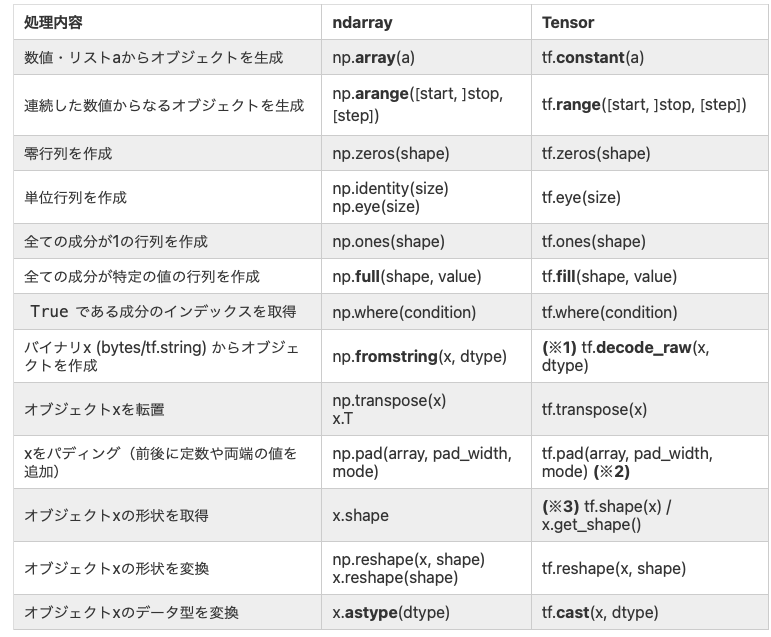

In [350]:
Image(filename='/Users/mac/Desktop/ラクスパートナーズ/Python/python-machine-learning-book-3rd-edition/ch13/images//tf使い方.png', width=500)

***テンソル作成***

* テンソルの属性の確認
* テンソルが参照している値の確認


In [576]:
a = np.array([1,2,3], dtype=np.int32)

t_a = tf.convert_to_tensor(a)
print(t_a)

t_ones = tf.ones((2,3))
print(t_ones.shape)
print(t_ones.numpy())

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
(2, 3)
[[1. 1. 1.]
 [1. 1. 1.]]


-テンソルの転置-

In [77]:
t = tf.random.uniform(shape=(3,5))
t_tr = tf.transpose(t)



print(t)
print(t_tr.numpy())
print(t.shape ,'-->',  t_tr.shape)




tf.Tensor(
[[0.734782   0.14221263 0.06338346 0.18919992 0.7981709 ]
 [0.7042463  0.4089347  0.51427484 0.07216728 0.3453163 ]
 [0.7506119  0.15332139 0.26366293 0.62515056 0.6546776 ]], shape=(3, 5), dtype=float32)
[[0.734782   0.7042463  0.7506119 ]
 [0.14221263 0.4089347  0.15332139]
 [0.06338346 0.51427484 0.26366293]
 [0.18919992 0.07216728 0.62515056]
 [0.7981709  0.3453163  0.6546776 ]]
(3, 5) --> (5, 3)


In [364]:
t_kari = tf.zeros((2,2,1,4,1,5,6))
t_kari_t  = tf.transpose(t_kari)

In [367]:
t_kari_t.shape

TensorShape([1, 4, 1, 2, 2])

-テンソルの形状変更(1次元べクトルを２次元ベクトルに変換する)-

In [579]:
t = tf.zeros((20,))
t_reshape = tf.reshape(t, shape=(4,5))
print(t)
print(t_reshape)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(20,), dtype=float32)
tf.Tensor(
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]], shape=(4, 5), dtype=float32)


-不要な次元の削除(サイズが１の次元の不要なものを削除)-

In [355]:
t = tf.zeros((2,2,1,4,1))
t_sqz = tf.squeeze(t, axis=(2,4))
print(t.shape,  '-->', t_sqz.shape)

(2, 2, 1, 4, 1) --> (2, 2, 4)


In [356]:
t.numpy()

array([[[[[0.],
          [0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.],
          [0.]]]],



       [[[[0.],
          [0.],
          [0.],
          [0.]]],


        [[[0.],
          [0.],
          [0.],
          [0.]]]]], dtype=float32)

In [357]:
t_sqz.numpy()

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

-テンソルでの算術演算-

ランダムなテンソルを作成してみる。t1は(-1,1)の範囲の一様分布のテンソル。t2は標準正規分布のテンソル。

In [217]:
tf.random.set_seed(1)
t1 = tf.random.uniform(shape=(5,2), minval=-1, maxval=1)
t2 = tf.random.normal(shape=(5,2), mean=0, stddev=1)

In [218]:
print(t1.numpy())
print(t2.numpy())

[[-0.6697383   0.80296254]
 [ 0.26194835 -0.13090777]
 [-0.41612196  0.28500414]
 [ 0.951571   -0.12980103]
 [ 0.32020378  0.20979166]]
[[ 0.40308788 -1.0880208 ]
 [-0.06309535  1.3365567 ]
 [ 0.7117601  -0.48928645]
 [-0.7642213  -1.0372486 ]
 [-1.2519338   0.02122428]]


In [587]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.26996338 -0.87363994]
 [-0.01652772 -0.17496566]
 [-0.296179   -0.13944866]
 [-0.7272108   0.13463594]
 [-0.40087393  0.00445268]]


t1とt2の行列と行列の積→t1×t2.T(転置)

In [243]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)
t5.numpy()

array([[-1.1436033 ,  1.1154624 , -0.8695717 , -0.3210435 ,  0.8555103 ],
       [ 0.2480186 , -0.19149339,  0.2504958 , -0.0644026 , -0.3307204 ],
       [-0.47782415,  0.40717956, -0.43562764,  0.02238911,  0.5270062 ],
       [ 0.52479297, -0.23352614,  0.74080014, -0.5925749 , -1.1940588 ],
       [-0.09918742,  0.26019508,  0.12526006, -0.46231267, -0.39642125]],
      dtype=float32)

テンソルt1の$L^2$ノルムを計算してみる

In [244]:
t1

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-0.6697383 ,  0.80296254],
       [ 0.26194835, -0.13090777],
       [-0.41612196,  0.28500414],
       [ 0.951571  , -0.12980103],
       [ 0.32020378,  0.20979166]], dtype=float32)>

In [588]:
t1_norm = tf.norm(t1, ord=2, axis=1).numpy()  #ord='euclidean'ユークリッド距離 ord=1だと絶対値の和
print(t1_norm)

[1.045609   0.29283747 0.5043658  0.9603831  0.38280934]


-テンソルの分割、積み上げ、連結-

In [82]:
a = tf.ones((3,))
a.numpy()

t_a_split = tf.split(a, num_or_size_splits=3)
list(t_a_split)

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>]

In [600]:
b = [[1,2,3,2,6],[2,2,11,1,3]]
c = [[0,2,0,2,0],[0,2,0,1,0]]

In [601]:
tf.concat([b, c], axis=1)

<tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[ 1,  2,  3,  2,  6,  0,  2,  0,  2,  0],
       [ 2,  2, 11,  1,  3,  0,  2,  0,  1,  0]], dtype=int32)>

-Tensorflow用にDatasetを作成-
* データがテンソル、Pythonリスト、Numpy配列として既に存在している場合は、tf.data.Dataset.from_tensor_slicesメソッドを使用することでデータセットを簡単に作成可能

In [603]:
a = [2, 4, 5, 11, 7]
ds = tf.data.Dataset.from_tensor_slices(a)   #as_numpy_iterator()

In [608]:
ds_ = ds.batch(2)

In [610]:
for i in ds_:
    print(i)

tf.Tensor([2 4], shape=(2,), dtype=int32)
tf.Tensor([ 5 11], shape=(2,), dtype=int32)
tf.Tensor([7], shape=(1,), dtype=int32)


* t_xは特徴量
* t_yはクラスラベル
とする

In [86]:
tf.random.set_seed(1)
t_x = tf.random.uniform([4,4], dtype=tf.float32)
t_y = tf.range(4)

In [87]:
print(t_x.numpy())
print(t_y.numpy())

[[0.16513085 0.9014813  0.6309742  0.4345461 ]
 [0.29193902 0.64250207 0.9757855  0.43509948]
 [0.6601019  0.60489583 0.6366315  0.6144488 ]
 [0.8893349  0.6277617  0.53197503 0.02597821]]
[0 1 2 3]


In [88]:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))

In [619]:
for ex in ds_joint.batch(1):
    print(ex[0].numpy(), ex[1].numpy())

[[0.16513085 0.9014813  0.6309742  0.4345461 ]] [0]
[[0.29193902 0.64250207 0.9757855  0.43509948]] [1]
[[0.6601019  0.60489583 0.6366315  0.6144488 ]] [2]
[[0.8893349  0.6277617  0.53197503 0.02597821]] [3]


-シャッフル、バッチ、リピート-
* 参考 https://youtu.be/c7G5W4Wv72Q

In [89]:
#シャッフル
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x)) #buffer_sizeが小さい値だとデータセットが完全にシャッフルされないため、訓練データの個数と同じ値orそれ以上に設定するのが良い buffer_size=len(t_x)
for x in ds:
    print('x:', x[0].numpy(), 'y:',x[1].numpy())

x: [0.6601019  0.60489583 0.6366315  0.6144488 ] y: 2
x: [0.29193902 0.64250207 0.9757855  0.43509948] y: 1
x: [0.16513085 0.9014813  0.6309742  0.4345461 ] y: 0
x: [0.8893349  0.6277617  0.53197503 0.02597821] y: 3


In [632]:
#リピート
ds = ds_joint.batch(2).repeat(count=2)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 4) [0 1]
1 (2, 4) [2 3]
2 (2, 4) [0 1]
3 (2, 4) [2 3]


In [90]:
#シャッフル＞バッチ＞リピート
tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 4) [2 1]
1 (2, 4) [0 3]
2 (2, 4) [0 3]
3 (2, 4) [1 2]
4 (2, 4) [3 0]
5 (2, 4) [1 2]


In [91]:
#バッチ＞シャッフル＞リピート
tf.random.set_seed(1)
ds = ds_joint.batch(2).shuffle(4).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 4) [0 1]
1 (2, 4) [2 3]
2 (2, 4) [0 1]
3 (2, 4) [2 3]
4 (2, 4) [2 3]
5 (2, 4) [0 1]


* シャッフルを一番初めに行うことでランダム性が増し予測性能に好影響?


## 線形回帰やってみよう

In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [74]:
X_train = np.arange(10).reshape((10,1))  #or .reshape(-1,1)
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

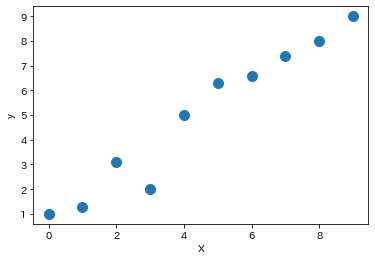

In [75]:
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [76]:
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
ds_train_orig = tf.data.Dataset.from_tensor_slices((tf.cast(X_train_norm, tf.float32), tf.cast(y_train, tf.float32))) 
#Kerasモジュールがfloat32のものが多くfloat64だとエラーになる

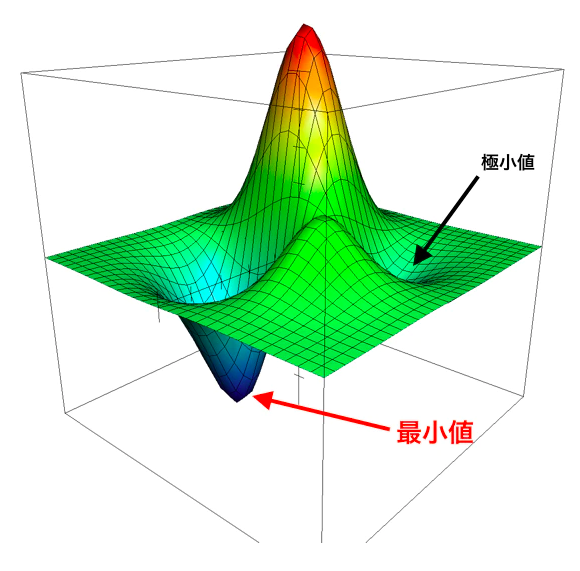

In [77]:
Image(filename='/Users/mac/Desktop/ラクスパートナーズ/Python/python-machine-learning-book-3rd-edition/ch13/images/確率的勾配降下法.png', width=500)

### 確率的勾配降下法
最急降下法とは違いパラメータの更新ごとにすべてのデータを用いる代わりに1つのデータだけ用いることで計算量を大幅に削減する。ランダムに選んだデータ点に対してパラメータの更新を行うため極小値に陥りにくい。








In [79]:
#モデの定義を行う
#https://shiokoji11235.com/linear-regression-by-tensorflow2
# Kerasは、「TensorFlow」「CNTK」「Theano」といった深層学習モジュール
#機械学習モジュールScikit-learnのように簡単に操作するためのモジュール

class MyModel(tf.keras.Model):   #tf.keras.Modelを継承する新しいクラスを定義
  def __init__(self):
    super(MyModel, self).__init__()  #学習する重み今回はwとbを定義
    self.w = tf.Variable(0.0, name='weight')
    self.b = tf.Variable(0.0, name='bias')

  def call(self, x):
    return self.w*x + self.b      #callメソッドでモデルが入力データをどのように使って出力をするか決定する

In [80]:
model = MyModel() #インスタンス化
model.build(input_shape=(None, 1))  #モデルのインプットshapeを指定→今回は特徴量１つのため1で設定、Noneとすることで任意の入力インプットを設定可能
model.summary()

Model: "my_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [81]:
  def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))  #平均二乗誤差(MSE)

  def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
      current_loss = loss_fn(model(inputs), outputs)   #model(inputs)はcallで計算された値
    dw, db = tape.gradient(current_loss, [model.w, model.b])   #tape.gradientでLossをwで偏微分、Lossをbで偏微分
    model.w.assign_sub(learning_rate*dw)  # Δw=η∇J(w) 
    model.b.assign_sub(learning_rate*db)  # Δb=η∇J(b)

In [82]:
tf.random.set_seed(1)
num_epochs = 200   #学習を繰り返す回数
log_steps=100
learning_rate = 0.001 #学習率
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train)/batch_size))

ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)
Ws, bs = [], []

for i, batch in enumerate(ds_train):
  if i >= steps_per_epoch*num_epochs:
    break
  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  bx, by = batch
  loss_val = loss_fn(model(bx), by)

  train(model, bx, by, learning_rate=learning_rate)
  if i%log_steps==0:
        print('Epoch {} Step{} Loss{}'.format(int(i/steps_per_epoch), i, loss_val))

Epoch 0 Step0 Loss43.55999755859375
Epoch 10 Step100 Loss0.7530134320259094
Epoch 20 Step200 Loss20.175859451293945
Epoch 30 Step300 Loss23.397605895996094
Epoch 40 Step400 Loss6.348119258880615
Epoch 50 Step500 Loss4.635603427886963
Epoch 60 Step600 Loss0.24105073511600494
Epoch 70 Step700 Loss0.20362770557403564
Epoch 80 Step800 Loss3.8176910877227783
Epoch 90 Step900 Loss0.9416388869285583
Epoch 100 Step1000 Loss0.7034985423088074
Epoch 110 Step1100 Loss0.034772761166095734
Epoch 120 Step1200 Loss0.5403661131858826
Epoch 130 Step1300 Loss0.11702598631381989
Epoch 140 Step1400 Loss0.11948295682668686
Epoch 150 Step1500 Loss0.09437620639801025
Epoch 160 Step1600 Loss0.4670370817184448
Epoch 170 Step1700 Loss2.0694775581359863
Epoch 180 Step1800 Loss0.001972649712115526
Epoch 190 Step1900 Loss0.3612426519393921


In [83]:
bs

[0.0,
 0.013200001,
 0.027961602,
 0.029967539,
 0.03392494,
 0.043862153,
 0.05974323,
 0.07752299,
 0.08994705,
 0.09251868,
 0.09863642,
 0.100607455,
 0.104459114,
 0.118965566,
 0.12147688,
 0.13125418,
 0.14685403,
 0.16432379,
 0.17655933,
 0.18258896,
 0.19531961,
 0.20954376,
 0.22220063,
 0.2241491,
 0.22659892,
 0.24377178,
 0.25892782,
 0.2684673,
 0.2744142,
 0.28641042,
 0.29000467,
 0.29240993,
 0.30486307,
 0.31985936,
 0.32928228,
 0.34606504,
 0.34801397,
 0.35152844,
 0.357373,
 0.37111947,
 0.3829053,
 0.3863574,
 0.39811268,
 0.39997095,
 0.41466907,
 0.4268059,
 0.43603244,
 0.44175833,
 0.45528555,
 0.4716374,
 0.47393024,
 0.47725207,
 0.4934939,
 0.50541246,
 0.5196994,
 0.5329281,
 0.5443519,
 0.5500186,
 0.5519029,
 0.5609074,
 0.56314015,
 0.57905227,
 0.58093387,
 0.5831735,
 0.5944936,
 0.60007584,
 0.6117381,
 0.6247413,
 0.6278477,
 0.63671,
 0.650614,
 0.6634958,
 0.679023,
 0.69045764,
 0.69349027,
 0.6956644,
 0.7067367,
 0.71220845,
 0.7258363,
 0.73

In [84]:
Ws

[0.0,
 0.0068934755,
 0.0197418,
 0.016599102,
 0.014532416,
 0.01280257,
 0.032154355,
 0.06000989,
 0.06217264,
 0.059039,
 0.053714193,
 0.050626174,
 0.048614707,
 0.061240956,
 0.058180805,
 0.056478795,
 0.07548789,
 0.10285774,
 0.10498767,
 0.099739544,
 0.106387906,
 0.11876845,
 0.12537828,
 0.12232563,
 0.11934042,
 0.14624512,
 0.16471343,
 0.16305281,
 0.1578767,
 0.15996498,
 0.15808794,
 0.15515701,
 0.16166045,
 0.17993408,
 0.17829376,
 0.20458731,
 0.20153393,
 0.19969855,
 0.1946115,
 0.20657627,
 0.20862792,
 0.20682512,
 0.20887145,
 0.20596014,
 0.22387044,
 0.2302087,
 0.22860256,
 0.22361882,
 0.23539275,
 0.26101118,
 0.25821728,
 0.2564825,
 0.28192857,
 0.2881528,
 0.30556205,
 0.31707615,
 0.31906477,
 0.3141325,
 0.31118044,
 0.30961296,
 0.30689228,
 0.33182174,
 0.3288738,
 0.32614473,
 0.3281153,
 0.32325664,
 0.32934704,
 0.3406649,
 0.33904266,
 0.33749992,
 0.35444263,
 0.36565477,
 0.38998133,
 0.39595288,
 0.39436913,
 0.39171985,
 0.39364728,
 0.38

In [85]:
print('Final Param', model.w.numpy(), model.b.numpy())

Final Param 2.6576622 4.8798566


In [86]:
print('Final Param', model.w.numpy(), model.b.numpy())

Final Param 2.6576622 4.8798566


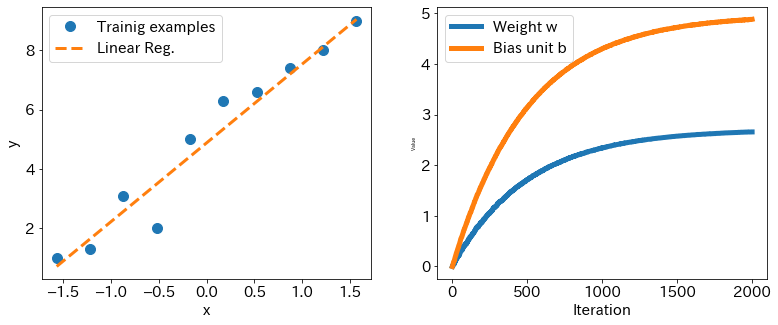

In [87]:
X_test = np.linspace(0,9,num=100).reshape(-1,1)
X_test_norm = (X_test - np.mean(X_train))/np.std(X_train)
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Trainig examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1,2,2)
plt.plot(Ws, lw=5)
plt.plot(bs, lw=5)
plt.legend(['Weight w', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=5)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [206]:
tf.random.set_seed(1)
model2=MyModel()
model2.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['mse'])

#生成したモデルに訓練（学習）プロセスを設定するにはcompile()を使う。

In [207]:
model2.fit(X_train_norm, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/200
10/10 [==============================] - 0s 2ms/step - loss: 27.8723 - mse: 27.8723
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 18.6586 - mse: 18.6586
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 12.5239 - mse: 12.5239
Epoch 4/200
10/10 [==============================] - 0s 10ms/step - loss: 8.4670 - mse: 8.4670
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 5.7632 - mse: 5.7632
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 3.9697 - mse: 3.9697
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 2.7766 - mse: 2.7766
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 1.9861 - mse: 1.9861
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4572 - mse: 1.4572
Epoch 10/200
10/10 [==============================] - 0s 1ms/step - loss: 1.1055 - mse: 1.1055
Epoch 11/200
10/10 [==============================] 

10/10 [==============================] - 0s 2ms/step - loss: 0.4138 - mse: 0.4138
Epoch 173/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4138 - mse: 0.4138
Epoch 174/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4138 - mse: 0.4138
Epoch 175/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4134 - mse: 0.4134
Epoch 176/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4135 - mse: 0.4135
Epoch 177/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4139 - mse: 0.4139
Epoch 178/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4137 - mse: 0.4137
Epoch 179/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4138 - mse: 0.4138
Epoch 180/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4135 - mse: 0.4135
Epoch 181/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4137 - mse: 0.4137
Epoch 182/200
10/10 [==============================] -

In [337]:
#X_train.dtype
#y_train.dtype

In [208]:
print(model2.w.numpy())
print(model2.b.numpy())

2.7067394
4.9657216


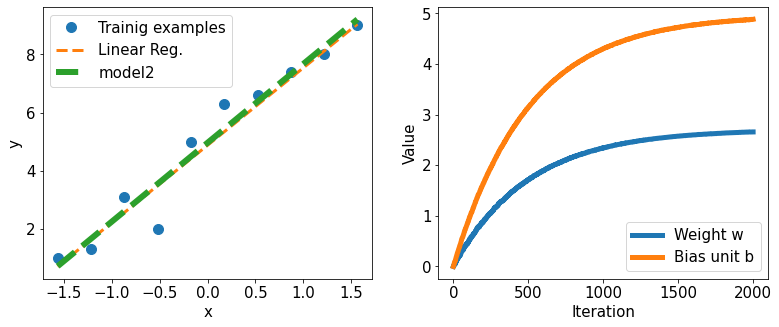

In [269]:
X_test = np.linspace(0,9,num=100).reshape(-1,1)
X_test_norm = (X_test - np.mean(X_train))/np.std(X_train)
y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))
y_pred2 = model2(tf.cast(X_test_norm, dtype=tf.float32))

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.plot(X_test_norm, y_pred2, '--', lw=6)
plt.legend(['Trainig examples', 'Linear Reg.', 'model2'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1,2,2)
plt.plot(Ws, lw=5)
plt.plot(bs, lw=5)
plt.legend(['Weight w', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()